In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%autosave 2

Autosaving every 2 seconds


In [2]:
# Dynamic Programming

# Defining numerical details

a = [-10] # action space
M = 1
m = 0.1
g = -9.8
L = 0.5
mu_c = 0.0005
mu_p = 0.000002
del_t = 0.02



In [3]:
# Initializing V and pi

V = np.random.rand(6,3,3,3)
pi = 0.5*np.ones([6,3,3,3,2])

theta = 0.01

gamma = 0.9 # This value is not given anywhere. I have taken it
# from an earlier problem in chapter 3 (3.14) of the RL textbook

a = np.array([-10,10])



In [4]:
# calculating p(s'|s,a) for each s', s and a
p_s_within = np.zeros([6,3,3,3,324])
count = 0
for i in range(0,V.shape[0]):
    for j in range(0,V.shape[1]):
        for k in range(0,V.shape[2]):
            for l in range(0,V.shape[3]):
                
                for act in a:

                    count = count +1

                    # DEFINING random points in the state
                    if i == 0:
                        t_range = (-6+12)*np.random.ranf(10000)+(-12)
                    elif i == 1:
                        t_range = (-1+6)*np.random.ranf(10000)+(-6)
                    elif i == 2:
                        t_range = (0+1)*np.random.ranf(10000)+(-1)
                    elif i == 3:
                        t_range = (1-0)*np.random.ranf(10000)+(0)
                    elif i == 4:
                        t_range = (6-1)*np.random.ranf(10000)+(1)
                    else:
                        t_range = (12-6)*np.random.ranf(10000)+(6)

                    if j == 0:
                        x_range = (-0.8+2.4)*np.random.ranf(10000)+(-2.4)
                    elif j == 1:
                        x_range = (0.8+0.8)*np.random.ranf(10000)+(-0.8)
                    else:
                        x_range = (2.4-0.8)*np.random.ranf(10000)+(0.8)

                    if k == 0: 
                        t_p_range = (-50+1000)*np.random.ranf(10000)+(-1000)
                    elif k == 1:
                        t_p_range = (50+50)*np.random.ranf(10000)+(-50)
                    else:
                        t_p_range = (1000-50)*np.random.ranf(10000)+(50)

                    if l == 0:
                        x_p_range = (-0.5+1000)*np.random.ranf(10000)+(-1000)
                    elif l == 1:
                        x_p_range = (0.5+0.5)*np.random.ranf(10000)+(-0.5)
                    else:
                        x_p_range = (1000 - 0.5)*np.random.ranf(10000)+(0.5)



                    # converting degrees to radians for np.cos and np.sin
                    t_p_range = np.radians(t_p_range)
                    t_range = np.radians(t_range)

                    # performing one step transition of given random points
                    t_2p = ((g*np.sin(t_range)) + (np.cos(t_range)*((-act-(m*L*t_p_range*t_p_range*np.sin(t_range))+(mu_c*np.sign(x_p_range)))/(M+m))) - ((mu_p*t_p_range)/m*L))/(L*(4/3 - ((m*((np.cos(2*t_range)+1)/2)/(m+M)))))
                    x_2p = (act+ (m*L*((t_p_range*t_p_range*np.sin(t_range))-(t_2p*np.cos(t_range)))) - (mu_c*np.sign(x_p_range)))/(M+m)
                    x_p = x_p_range + del_t*x_2p
                    x = x_range + del_t*x_p
                    t_p = t_p_range + del_t*t_2p
                    t = t_range + del_t*t_p

                    #converting back to degrees for boxes system comparison
                    t_p = np.degrees(t_p)
                    t = np.degrees(t)

                    # calculating the number of resulting points that lie within each box
                    IDs = np.ones([10000,4])

                    for iD in range(0,10000):

                        if -12<t[iD]<-6:
                            IDs[iD,0] = 0
                        elif -6<t[iD]<-1:
                            IDs[iD,0] = 1
                        elif -1<t[iD]<0:
                            IDs[iD,0] = 2
                        elif 0<t[iD]<1:
                            IDs[iD,0] = 3
                        elif 1<t[iD]<6:
                            IDs[iD,0] = 4
                        elif 6<t[iD]<12: 
                            IDs[iD,0] = 5
                        else:
                            IDs[iD,0] = 'NaN'


                        if -2.4<x[iD]<-0.8:
                            IDs[iD,1] = 0
                        elif -0.8<x[iD]<0.8:
                            IDs[iD,1] = 1
                        elif 0.8<x[iD]<2.4:
                            IDs[iD,1] = 2 
                        else:
                            IDs[iD,1] = 'NaN'   

                        if t_p[iD]<-50:
                            IDs[iD,2] = 0
                        elif -50<t_p[iD]<50:
                            IDs[iD,2] = 1
                        elif 50<t_p[iD]:
                            IDs[iD,2] = 2  
                        else:
                            IDs[iD,2] = 'NaN'

                        if x_p[iD]<-0.5:
                            IDs[iD,2] = 0
                        elif -0.5<x_p[iD]<0.5:
                            IDs[iD,2] = 1
                        elif 0.5<x_p[iD]:
                            IDs[iD,2] = 2  
                        else:
                            IDs[iD,2] = 'NaN'   

                        # calculating p(s'|s,a)
                        if np.isnan(IDs[iD,0])== False and np.isnan(IDs[iD,1])== False and np.isnan(IDs[iD,2])== False and np.isnan(IDs[iD,1])== False:
                            p_s_within[np.int(IDs[iD,0])][np.int(IDs[iD,1])][np.int(IDs[iD,2])][np.int(IDs[iD,3])][count-1] = p_s_within[np.int(IDs[iD,0])][np.int(IDs[iD,1])][np.int(IDs[iD,2])][np.int(IDs[iD,3])][count-1] + 1

p_s_within = p_s_within/10000
print('Complete')

Complete


In [5]:
m_count = 0
stable = False
while stable == False:
    m_count = m_count + 1
    
    delta = theta+1

    while delta>theta: #and count < 10:
        count2 = 0
        DELTA = delta
        v = V.copy()
        for i in range(0,V.shape[0]):
            for j in range(0,V.shape[1]):
                for k in range(0,V.shape[2]):
                    for l in range(0,V.shape[3]):
                        pV = 0
                        for act in a:
                            count2 = count2+1

                            if act == -10:
                                a_ind = 0
                            else:    
                                a_ind = 1

                            pV = pV + np.sum(pi[:,:,:,:,a_ind] * p_s_within[:,:,:,:,count2-1] *[1+ gamma*V])

                        V[i,j,k,l]  = pV

        delta = np.sum(np.abs(v-V))

    # POLICY IMPROVEMENT
    count3 = 0
    pi_old = pi.copy()
    for i in range(0,V.shape[0]):
        for j in range(0,V.shape[1]):
            for k in range(0,V.shape[2]):
                for l in range(0,V.shape[3]):
                    for act in a:
                        count3 = count3+1
                        if act == -10:
                            a_ind = 0
                        else:    
                            a_ind = 1

                        pi[i,j,k,l,a_ind] = np.sum(p_s_within[:,:,:,:,count3-1]*(1+gamma*V))
                    
                    max_index_col = np.argmax(pi[i,j,k,l,:], axis=0)
                    pi[i,j,k,l,:] = [0,0]
                    pi[i,j,k,l,max_index_col] = 1


    if np.sum(pi_old == pi) != 0:
        stable = False
    else:
        stable = True
    

    print(m_count, np.sum(pi_old == pi))    


1 0


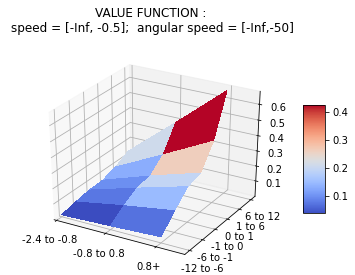

In [6]:
# Plotting value function as a function of angle and location for 
# 3 chosen values of rate of angular change and speed

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.array([0,1,2,3,4,5])
Y = np.array([0,1,2])
X, Y = np.meshgrid(Y, X)
Z = V[:,:,0,0]
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('VALUE FUNCTION : \n speed = [-Inf, -0.5];  angular speed = [-Inf,-50] \n \n')
plt.yticks([0,1,2,3,4,5], ('-12 to -6', '-6 to -1', '-1 to 0', '0 to 1', '1 to 6','6 to 12'))
plt.xticks([0,1,2],('-2.4 to -0.8','-0.8 to 0.8','0.8+'))
plt.xlim((0,2.5))
plt.show()

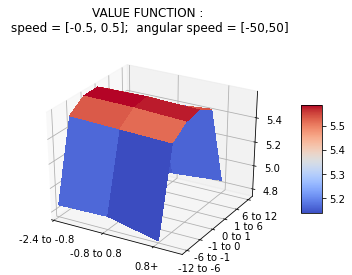

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.array([0,1,2,3,4,5])
Y = np.array([0,1,2])
X, Y = np.meshgrid(Y, X)
Z = V[:,:,1,1]
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('VALUE FUNCTION : \n speed = [-0.5, 0.5];  angular speed = [-50,50] \n \n')
plt.yticks([0,1,2,3,4,5], ('-12 to -6', '-6 to -1', '-1 to 0', '0 to 1', '1 to 6','6 to 12'))
plt.xticks([0,1,2],('-2.4 to -0.8','-0.8 to 0.8','0.8+'))
plt.xlim((0,2.5))
plt.show()

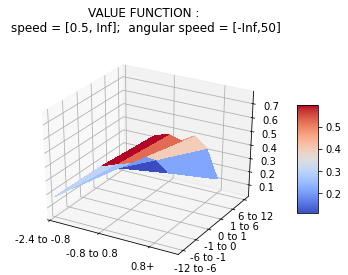

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.array([0,1,2,3,4,5])
Y = np.array([0,1,2])
X, Y = np.meshgrid(Y, X)
Z = V[:,:,2,0]
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('VALUE FUNCTION : \n speed = [0.5, Inf];  angular speed = [-Inf,50] \n \n')
plt.yticks([0,1,2,3,4,5], ('-12 to -6', '-6 to -1', '-1 to 0', '0 to 1', '1 to 6','6 to 12'))
plt.xticks([0,1,2],('-2.4 to -0.8','-0.8 to 0.8','0.8+'))
plt.xlim((0,2.5))
plt.show()

In [9]:
# converting the policy for plotting purposes
plottingPI = np.argmax(pi, axis = 4)

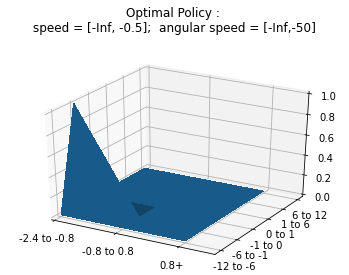

In [10]:
# Plotting optimal policy as a function of angle and location for 
# 3 chosen values of rate of angular change and speed

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.array([0,1,2,3,4,5])
Y = np.array([0,1,2])
X, Y = np.meshgrid(Y, X)
Z = plottingPI[:,:,0,0]
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.

plt.title('Optimal Policy : \n speed = [-Inf, -0.5];  angular speed = [-Inf,-50] \n \n')
plt.yticks([0,1,2,3,4,5], ('-12 to -6', '-6 to -1', '-1 to 0', '0 to 1', '1 to 6','6 to 12'))
plt.xticks([0,1,2],('-2.4 to -0.8','-0.8 to 0.8','0.8+'))
plt.xlim((0,2.5))
plt.show()

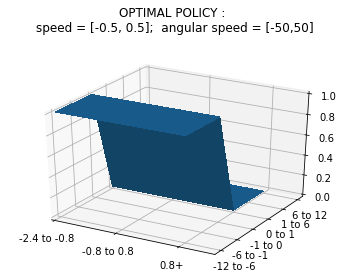

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.array([0,1,2,3,4,5])
Y = np.array([0,1,2])
X, Y = np.meshgrid(Y, X)
Z = plottingPI[:,:,1,1]
surf = ax.plot_surface(X, Y, Z,linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.

plt.title('OPTIMAL POLICY : \n speed = [-0.5, 0.5];  angular speed = [-50,50] \n \n')
plt.yticks([0,1,2,3,4,5], ('-12 to -6', '-6 to -1', '-1 to 0', '0 to 1', '1 to 6','6 to 12'))
plt.xticks([0,1,2],('-2.4 to -0.8','-0.8 to 0.8','0.8+'))
plt.xlim((0,2.5))
plt.show()

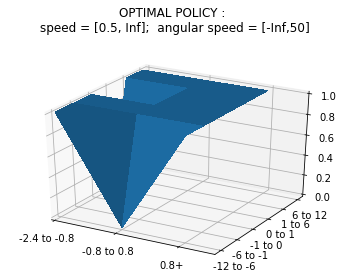

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.array([0,1,2,3,4,5])
Y = np.array([0,1,2])
X, Y = np.meshgrid(Y, X)
Z = plottingPI[:,:,2,0]
surf = ax.plot_surface(X, Y, Z,linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.

plt.title('OPTIMAL POLICY : \n speed = [0.5, Inf];  angular speed = [-Inf,50] \n \n')
plt.yticks([0,1,2,3,4,5], ('-12 to -6', '-6 to -1', '-1 to 0', '0 to 1', '1 to 6','6 to 12'))
plt.xticks([0,1,2],('-2.4 to -0.8','-0.8 to 0.8','0.8+'))
plt.xlim((0,2.5))
plt.show()